Analisi di $R^{2}$ e $MAE~$ in funzione della grandezza del dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np

R2_50 = [0.975831, 0.986558, 0.989601, 0.991889, 0.994026]
R2_32 = [0.984095, 0.98493, 0.989075, 0.991605, 0.990587]
R2_18 = [0.961985, 0.965246, 0.960034, 0.972101, 0.974052]
mae_50 = [0.043602, 0.030997, 0.026506, 0.023303, 0.019833]
mae_32 = [0.032974, 0.033604, 0.027208, 0.024573, 0.024991]
mae_18 = [0.0543855, 0.051827, 0.056691, 0.045786, 0.045014]
#sizes = np.linspace(20000, 100000, 5)
sizes = [22136, 33204, 44272, 60875, 99612]

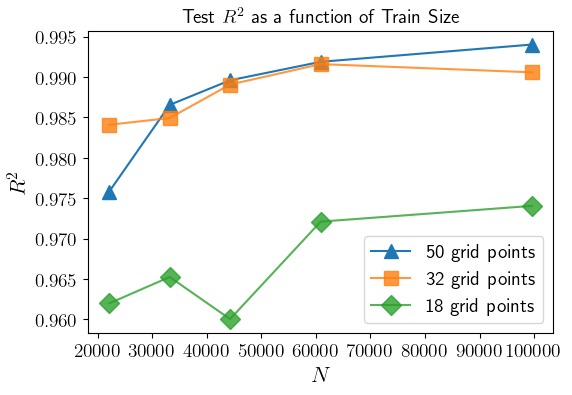

In [9]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True

plt.plot(sizes, R2_50, marker="^", ms=10, label="50 grid points")
plt.plot(sizes, R2_32, marker="s", alpha=.8, ms=10, label="32 grid points")
plt.plot(sizes, R2_18, marker="D", alpha=.8, ms=10, label="18 grid points")
plt.legend(loc=4, prop={'size': 14})
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$R^2$", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.title("Test $R^2$ as a function of Train Size", fontsize=14)
plt.show()

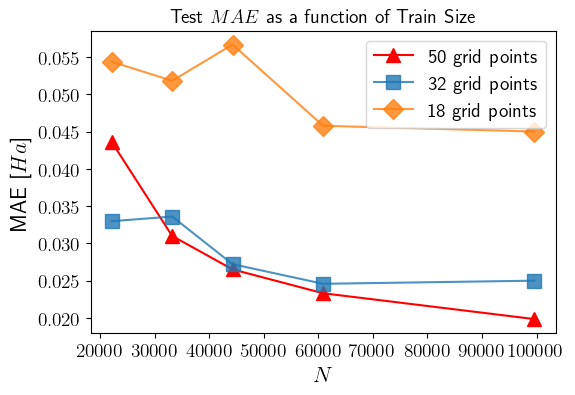

In [10]:
plt.plot(sizes, mae_50, marker="^", ms=10, color='r', label="50 grid points")
plt.plot(sizes, mae_32, marker="s", alpha=.8, ms=10, label="32 grid points")
plt.plot(sizes, mae_18, marker="D", alpha=.8, ms=10, label="18 grid points")
plt.xlabel("$N$", fontsize=16)
plt.ylabel(f"MAE [$Ha$]", fontsize=16)
plt.legend(loc=1, prop={'size': 14})
plt.title("Test $MAE$ as a function of Train Size", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Molecules size histograms:

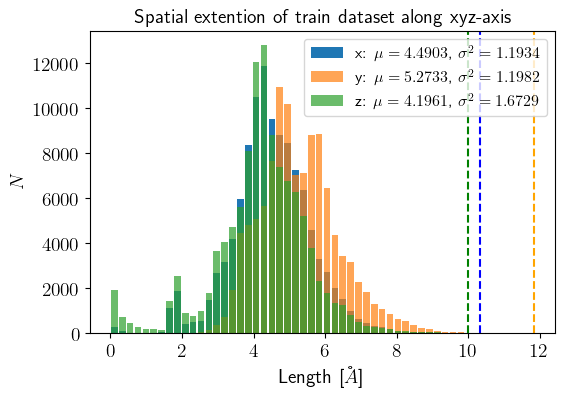

In [11]:
# from scipy.stats import norm
train_sizes = np.load("/Users/lucabrodoloni/Desktop/Stage/workgpu/train_size_dict.npz")
# Mean Values
x_mean = round(train_sizes["sizes_x"].mean(), 4)
y_mean = round(train_sizes["sizes_y"].mean(), 4)
z_mean = round(train_sizes["sizes_z"].mean(), 4)

# Max values 
x_max = train_sizes["sizes_x"].max()
y_max = train_sizes["sizes_y"].max()
z_max = train_sizes["sizes_z"].max()

# Variances
x_var = round(train_sizes["sizes_x"].var(), 4)
y_var = round(train_sizes["sizes_y"].var(), 4)
z_var = round(train_sizes["sizes_z"].var(), 4)

# (mu, sigma) = norm.fit(train_sizes)
# print(mu, sigma)
plt.hist(train_sizes["sizes_x"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=1, label=f"x: $\mu={x_mean}$, $\sigma^2={x_var}$")
plt.hist(train_sizes["sizes_y"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=0.7, label=f"y: $\mu={y_mean}$, $\sigma^2={y_var}$")
plt.hist(train_sizes["sizes_z"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=0.7, label=f"z: $\mu={z_mean}$, $\sigma^2={z_var}$")
plt.legend(prop={"size": 11.5})
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Length [$\AA$]", size=14)
plt.ylabel("$N$", size=14)
plt.title("Spatial extention of train dataset along xyz-axis", size=14)
plt.axvline(x_max, c='b', linestyle='--')
plt.axvline(y_max, c='orange', linestyle='--')
plt.axvline(z_max, c='g', linestyle='--')
# plt.hist(train_sizes["sizes_y"], bins=100, range=(0, 11), density=False)
# plt.hist(train_sizes["sizes_z"], bins=100, range=(0, 11), density=False)
plt.show()

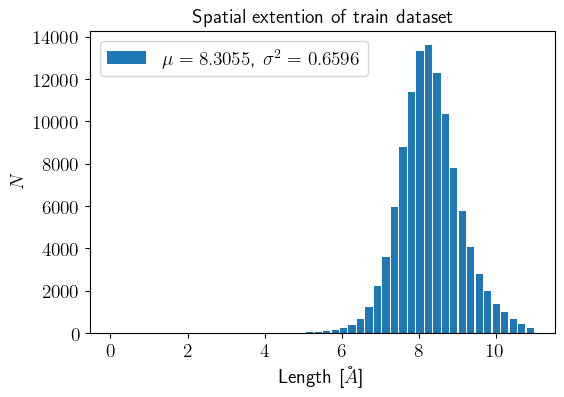

In [31]:

mean_size = round(train_sizes["size"].mean(), 4)
var_size = round(train_sizes["size"].var(), 4)
 
plt.hist(train_sizes["size"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=1, label=f"$\mu={mean_size}$, $\sigma^2={var_size}$")
plt.legend(prop={"size":14})
plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel("Length [$\AA$]", size=14)
plt.ylabel("$N$", size=14)
plt.title("Spatial extention of train dataset", size=14)
plt.show()


Test Predicitons Scatter Plots:


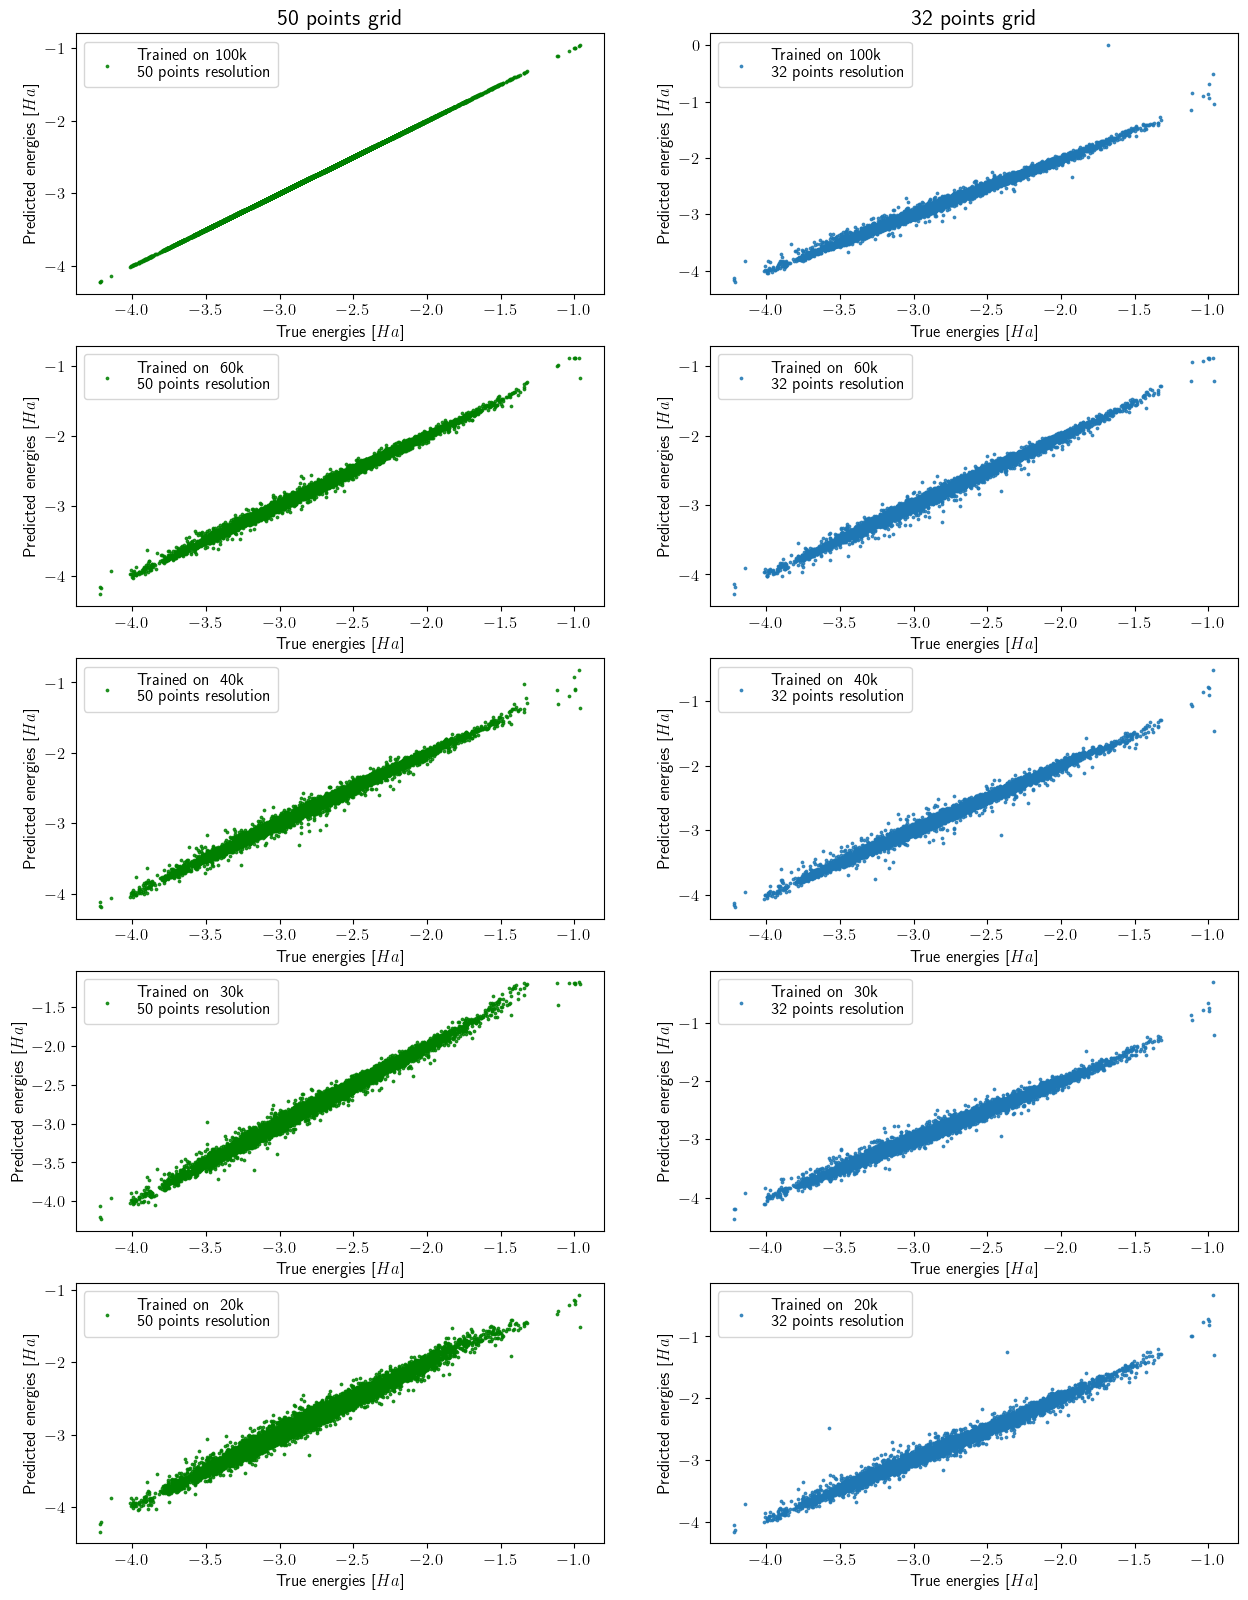

In [30]:
predictions_path = "/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/"
true_targets_test = np.loadtxt(f"{predictions_path}/99612train_50grid_prediction.txt")
grid50_100k = np.loadtxt(f"{predictions_path}/99612train_50grid_prediction.txt")
grid32_100k = np.loadtxt(f"{predictions_path}/99612train_32grid_prediction.txt")
grid50_60k = np.loadtxt(f"{predictions_path}/60875train_50grid_prediction.txt")
grid32_60k = np.loadtxt(f"{predictions_path}/60875train_32grid_prediction.txt")
grid50_40k = np.loadtxt(f"{predictions_path}/44272train_50grid_prediction.txt")
grid32_40k = np.loadtxt(f"{predictions_path}/44272train_32grid_prediction.txt")
grid50_30k = np.loadtxt(f"{predictions_path}/33204train_50grid_prediction.txt")
grid32_30k = np.loadtxt(f"{predictions_path}/33204train_32grid_prediction.txt")
grid50_20k = np.loadtxt(f"{predictions_path}/22136train_50grid_prediction.txt")
grid32_20k = np.loadtxt(f"{predictions_path}/22136train_32grid_prediction.txt")
#color = np.random.rand(len(true_targets_test))
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15, 20))
ax[0][0].set_title("50 points grid", size=16)
ax[0][1].set_title("32 points grid", size=16)




ax[0][0].scatter(true_targets_test, grid50_100k, c='Green', s=3, alpha=0.8, label='Trained on 100k \n50 points resolution')
ax[0][1].scatter(true_targets_test, grid32_100k,  s=3, alpha=0.8, label='Trained on 100k \n32 points resolution')
ax[1][0].scatter(true_targets_test, grid50_60k, s=3, c='Green', alpha=0.8, label='Trained on ~60k \n50 points resolution')
ax[1][1].scatter(true_targets_test, grid32_60k, s=3, alpha=0.8, label='Trained on ~60k \n32 points resolution')
ax[2][0].scatter(true_targets_test, grid50_40k, s=3, c='Green', alpha=0.8, label='Trained on ~40k \n50 points resolution')
ax[2][1].scatter(true_targets_test, grid32_40k, s=3, alpha=0.8, label='Trained on ~40k \n32 points resolution')
ax[3][0].scatter(true_targets_test, grid50_30k, s=3, c='Green', alpha=0.8, label='Trained on ~30k \n50 points resolution')
ax[3][1].scatter(true_targets_test, grid32_30k, s=3, alpha=0.8, label='Trained on ~30k \n32 points resolution')
ax[4][0].scatter(true_targets_test, grid50_20k, s=3, c='Green',  alpha=0.8, label='Trained on ~20k \n50 points resolution')
ax[4][1].scatter(true_targets_test, grid32_20k, s=3, alpha=0.8, label='Trained on ~20k \n32 points resolution')

for i in range(5):
    for j in range(2):
        ax[i][j].set_xlabel("True energies [$Ha$]", size=12)
        ax[i][j].set_ylabel("Predicted energies [$Ha$]", size=12)
        ax[i][j].tick_params(axis='x', labelsize=12)
        ax[i][j].tick_params(axis='y', labelsize=12)
        ax[i][j].legend(prop={"size": 12})